# MODELO SECUENCIAL BÁSICO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
ruta_entrenamiento = './data/train/'
ruta_validacion = './data/val/'
ruta_prueba = './data/test/'

In [3]:
class_names = ["aloevera", "banana", "longbeans", "coconut", "corn", "cucumber", "curcuma", "eggplant", "galangal",
               "ginger", "mango", "melon", "orange", "papaya", "peperchili", "pineapple", "pomelo", "spinach",
               "sweetpotatoes", "watermelon"]

image_size = (112,112)

class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'aloevera': 0,
 'banana': 1,
 'longbeans': 2,
 'coconut': 3,
 'corn': 4,
 'cucumber': 5,
 'curcuma': 6,
 'eggplant': 7,
 'galangal': 8,
 'ginger': 9,
 'mango': 10,
 'melon': 11,
 'orange': 12,
 'papaya': 13,
 'peperchili': 14,
 'pineapple': 15,
 'pomelo': 16,
 'spinach': 17,
 'sweetpotatoes': 18,
 'watermelon': 19}

In [4]:
from PIL import Image
import os
import numpy as np

def read_data(path, im_size, class_names_label):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path,folder)
        
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path,file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, im_size)
            X.append(image)
            y.append(label)
    
    return np.array(X), np.array(y)


X_train, y_train = read_data(ruta_entrenamiento, image_size, class_names_label)
X_val, y_val = read_data(ruta_validacion, image_size, class_names_label)
X_test, y_test = read_data(ruta_prueba, image_size, class_names_label)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)



(14000, 112, 112, 3)
(2000, 112, 112, 3)
(4000, 112, 112, 3)


In [5]:
print(y_train.shape)
print(y_test.shape)

(14000,)
(4000,)


In [6]:
y_train

array([ 0,  0,  0, ..., 19, 19, 19])

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [8]:
y_train[0:10]

array([ 5,  5, 11,  6, 11, 10, 12, 10, 14,  8])

In [9]:
X_train.max()

255

In [10]:
X_train_scal = X_train/255.0
X_val_scal = X_val/255.0
X_test_scal = X_test/255.0

In [11]:
X_train_scal.shape

(14000, 112, 112, 3)

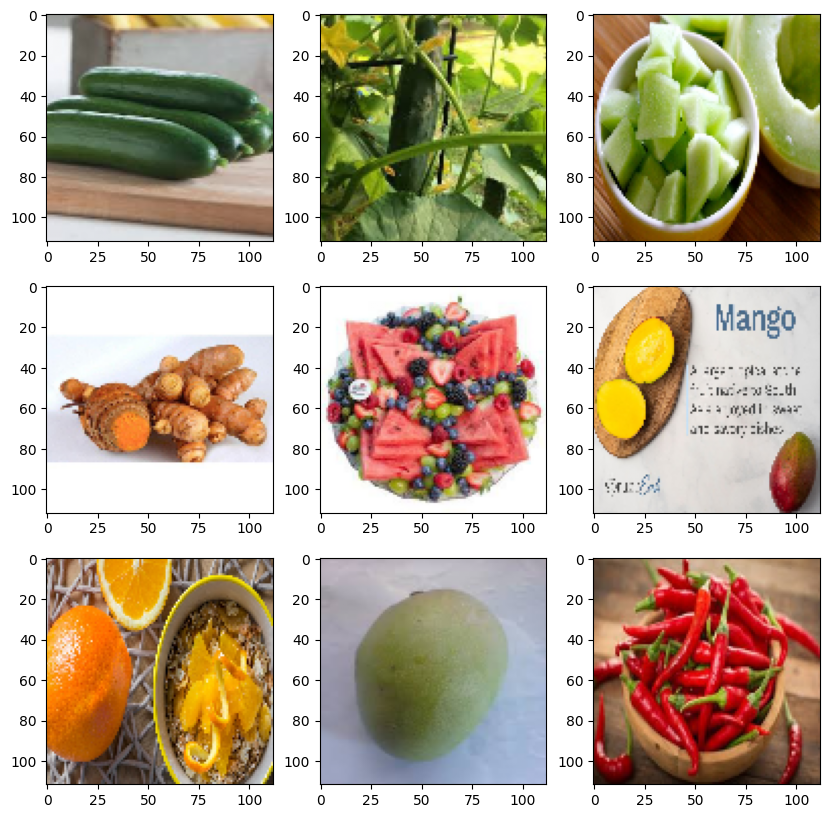

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(0, 9):
    ax[int(i / 3), (i % 3)].imshow(X_train_scal[i])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(112, 112, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(20, activation='softmax')) 

In [14]:
model.compile(optimizer= 'adam', loss= "sparse_categorical_crossentropy", metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 55, 55, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 64)        0

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = './mejor_sequential.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy', 
    mode='max',
    verbose=1
)
model.save('mejor_sequential.h5')

c:\Users\alexe\anaconda3\envs\deep_learning_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
history = model.fit(X_train_scal, y_train, batch_size=256, epochs=10, validation_data=(X_val_scal, y_val))

MemoryError: Unable to allocate 1.96 GiB for an array with shape (14000, 112, 112, 3) and data type float32

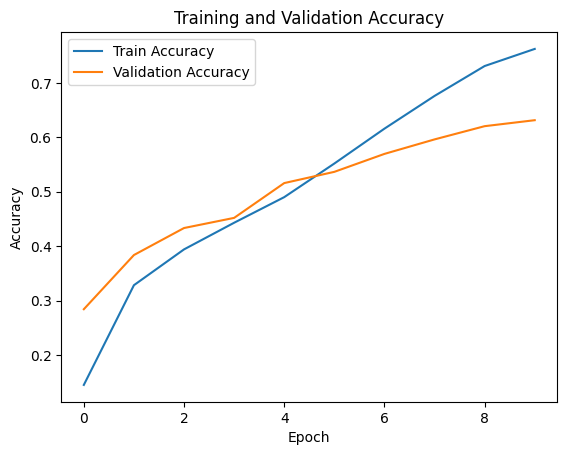

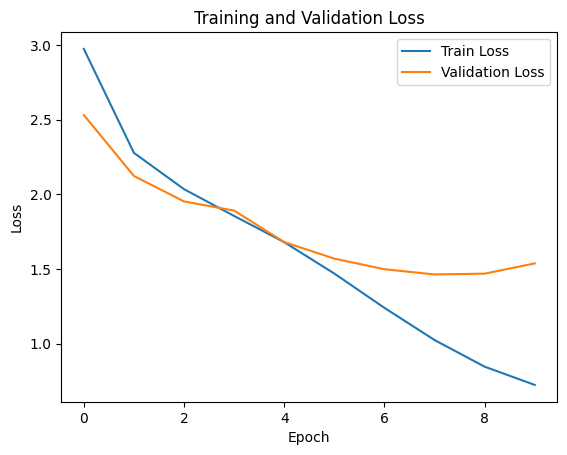

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import os
print(os.getcwd())


c:\Users\alexe\Desktop\Proyectos EDA\PERSONAL\Proyectitos\Proyecto ML 2


In [ ]:
#Para conocer las metricas conseguidas en test y poder comparar despues entre los modelos
from tensorflow.keras.models import load_model

best_model = load_model('mejor_sequential.h5')   #cargar el modelo si no lo tengo ya

test_loss, test_accuracy = model.evaluate(X_test_scal, y_test)
print(f'\nTest Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')

188/188 [==============================] - 4s 20ms/step - loss: 1.8373 - accuracy: 0.5893

Test Accuracy: 0.5893, Test Loss: 1.8373


In [ ]:
predictions = best_model.predict(X_test_scal)

188/188 [==============================] - 4s 20ms/step


188/188 [==============================] - 4s 20ms/step


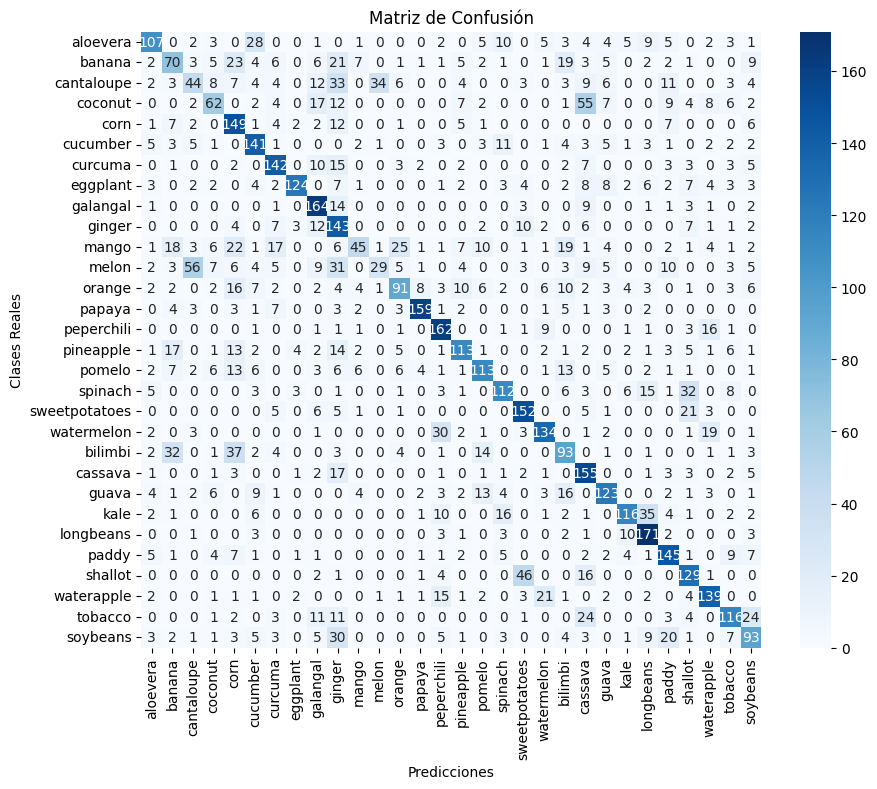

In [ ]:
from sklearn.metrics import confusion_matrix

# Obtener las probabilidades de las clases
y_prob = best_model.predict(X_test_scal)

# Tomar la clase con la probabilidad más alta como la predicción
y_pred = np.argmax(y_prob, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Clases Reales')
plt.show()

In [ ]:
#O este o el de arriba...
from sklearn.metrics import classification_report

# Obtener un informe de clasificación
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

               precision    recall  f1-score   support

     aloevera       0.69      0.54      0.60       200
       banana       0.41      0.35      0.38       200
   cantaloupe       0.34      0.22      0.27       200
      coconut       0.53      0.31      0.39       200
         corn       0.48      0.74      0.58       200
     cucumber       0.60      0.70      0.65       200
      curcuma       0.65      0.71      0.68       200
     eggplant       0.89      0.62      0.73       200
     galangal       0.61      0.82      0.70       200
       ginger       0.37      0.71      0.48       200
        mango       0.59      0.23      0.33       200
        melon       0.43      0.14      0.22       200
       orange       0.59      0.46      0.51       200
       papaya       0.87      0.80      0.83       200
   peperchili       0.64      0.81      0.72       200
    pineapple       0.66      0.56      0.61       200
       pomelo       0.64      0.56      0.60       200
      spi